**Assignment Week 4**

Due: 2/12/2024

Shimon Greengart

I chose to use the sepal length and petal length as independent variables due to their creating a clear split. I had 1 mean setosa and 0 mean non-setosa.

I could have used more than 2 independent variables, but it seemed like you only wanted two so we could have nice graphics.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

from sklearn import datasets, model_selection

# Setup code for both versions, professor and keras

X, y = datasets.load_iris(return_X_y=True)

X = np.stack((X[:, 0], X[:, 2]), axis=1)  # keeping the two features I'm using
y = [1 if val == 0 else 0 for val in y]  # Adjusting for two classes instead of 3

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)
# I don't know of an easier way to get the result into numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

The following code I took from the professor's Colab. In this code, I don't have a train-test split, though I do in the TensorFlow code.

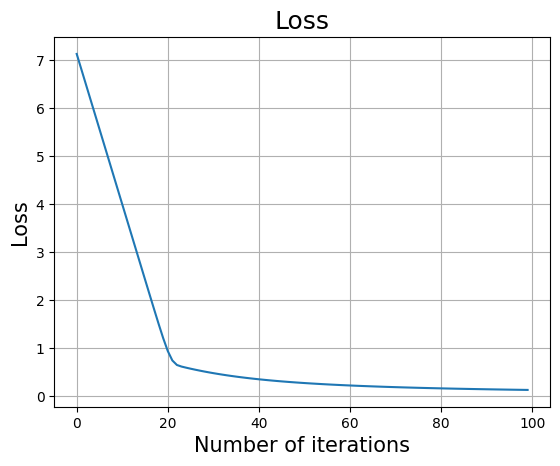

In [7]:
LEARNING_RATE = 0.1
NUM_EPOCHS = 100
NUM_POINTS = len(X)

sigmoid = lambda x: 1/(1+np.exp(-x))

def get_loss_numerically_stable(y, z):
   return -1 * (y * -1 * np.log(1 + np.exp(-z)) +
                (1-y) * (-z - np.log(1 + np.exp(-z))))

w_cache = []
b_cache = []
l_cache = []

w = np.array([random.uniform(-5, 5), random.uniform(-5, 5)])
b = random.uniform(-5, 5)

for i in range(NUM_EPOCHS):
    dw = np.zeros(w.shape)
    db = 0.0
    loss = 0.0

    for j in range(X.shape[0]):
        x_j = X[j,:]
        y_j = y[j]

        z_j = w.dot(x_j) + b
        a_j = sigmoid(z_j)

        loss_j = get_loss_numerically_stable(y_j, z_j)

        dw_j = x_j * (a_j-y_j)
        db_j = a_j - y_j

        dw += dw_j
        db += db_j
        loss += loss_j

    dw = (1.0/NUM_POINTS) * dw
    db = (1.0/NUM_POINTS) * db
    loss = (1.0/NUM_POINTS) * loss

    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db

    w_cache.append(w.copy())
    b_cache.append(b)
    l_cache.append(loss)

plt.grid()
plt.title('Loss', size=18)
plt.xlabel('Number of iterations', size=15)
plt.ylabel('Loss', size=15)
plt.plot(l_cache)

plt.show()

# print("Weights are", w[0], "and", w[1], "with a bias of", b)


# def solve_log(row, w, b):
#     return sigmoid(w[0] * row[0] + w[1] * row[1] + b)

# for row, val in zip(X, y):
#     print(solve_log(row, w, b), val)


This is code used to show the resulting classifier dividing line.

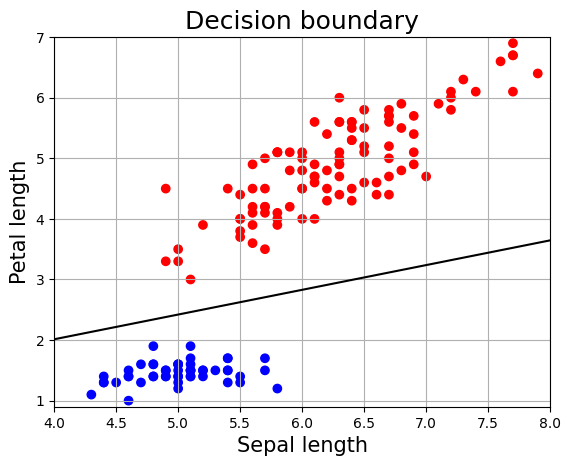

In [8]:
colormap = np.array(['r', 'b', 'b'])

def plot_decision_boundary(X, y, w, b):
    plt.grid()
    plt.xlim([4.0, 8.0])
    plt.ylim([0.9, 7.0])
    plt.title('Decision boundary', size = 18)
    plt.xlabel('Sepal length', size=15)
    plt.ylabel('Petal length', size=15)

    xs = np.array([4.0, 8.0])
    ys = (-w[0] * xs - b)/w[1]

    plt.scatter(X[:,0], X[:,1], c=colormap[y])
    plt.plot(xs, ys, c='black')

plot_decision_boundary(X, y, w, b)  # Note: Said 0.5 instead of b before

plt.show()

# def solve_log(row, w, b):
#     return sigmoid(w[0] * row[0] + w[1] * row[1] + b)

# for row, val in zip(X[30:70], y[30:70]):
#     print(solve_log(row, w, b), val)

Here is the Keras/TensorFlow 2 code. Code was initially borrowed from https://www.marktechpost.com/2021/04/08/logistic-regression-with-keras/, though I have made many adjustments since then. You can see that the accuracy, precision, and recall for both train and validation data are 100%. This is a very easy problem. I don't know why Keras takes so much longer to train than your code, I would have assumed it would be more optimized.

In [9]:
from tensorflow.keras import models, layers, metrics, optimizers

number_of_classes = 2
number_of_features = 2

model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_dim=number_of_features))
model.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=[metrics.BinaryAccuracy(), metrics.Precision(), metrics.Recall()])
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
model.summary()
# print(model.weights)

Epoch 1/100
5/5 [==============================] - 1s 72ms/step - loss: 2.8781 - binary_accuracy: 0.3333 - precision_1: 0.3333 - recall_1: 1.0000 - val_loss: 2.5422 - val_binary_accuracy: 0.3333 - val_precision_1: 0.3333 - val_recall_1: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 2.4907 - binary_accuracy: 0.3333 - precision_1: 0.3333 - recall_1: 1.0000 - val_loss: 2.1592 - val_binary_accuracy: 0.3333 - val_precision_1: 0.3333 - val_recall_1: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 2.1021 - binary_accuracy: 0.3333 - precision_1: 0.3333 - recall_1: 1.0000 - val_loss: 1.7902 - val_binary_accuracy: 0.3333 - val_precision_1: 0.3333 - val_recall_1: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 1.7309 - binary_accuracy: 0.3333 - precision_1: 0.3333 - recall_1: 1.0000 - val_loss: 1.4424 - val_binary_accuracy: 0.3333 - val_precision_1: 0.3333 - val_recall_1: 1.0000
Epoch 5/100
5/5 [=======

This code shows the division line created by the TensorFlow code.

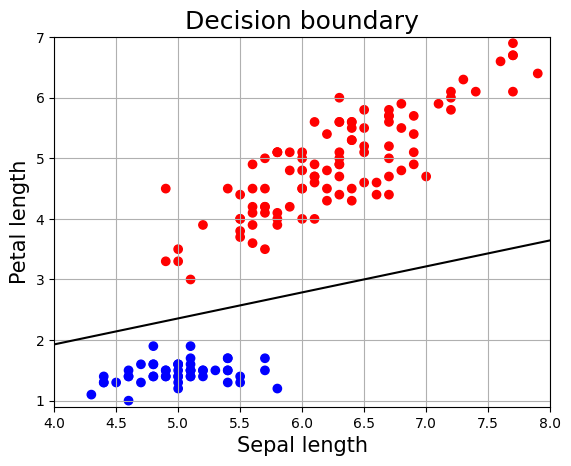

In [10]:
weights = model.weights[0]
bias = model.weights[1]
# print(weights)
# print(bias)

plot_decision_boundary(X, y, weights, bias)

plt.show()